# Descriptive (Spatial) Analytics

Analyze taxi demand patterns for the relevant one-year period and 
city (please check carefully which year your team has been allocated). 

Specifically show how these
patterns (start time, trip length, start and end location, price, average idle time between trips, and so 
on) for the given sample varies in different spatio-temporal resolution (i.e., census tract vs. varying
hexagon diameter and/or temporal bin sizes). 

Give possible reasons for the observed patterns.

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
# import dataset
dfChicago = pd.read_csv("data\datasets\df_chicago.csv")
dfChicago.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8973726 entries, 0 to 8973725
Data columns (total 44 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Trip_ID                     object 
 1   Taxi_ID                     object 
 2   Trip_Start_Timestamp        object 
 3   Trip_End_Timestamp          object 
 4   Trip_Seconds                float64
 5   Trip_Miles                  float64
 6   Pickup_Census_Tract         float64
 7   Dropoff_Census_Tract        float64
 8   Pickup_Community_Area       float64
 9   Dropoff_Community_Area      float64
 10  Fare                        float64
 11  Tips                        float64
 12  Tolls                       float64
 13  Extras                      float64
 14  Payment_Type                object 
 15  Pickup_Centroid_Latitude    float64
 16  Pickup_Centroid_Longitude   float64
 17  Pickup_Centroid_Location    object 
 18  Dropoff_Centroid_Latitude   float64
 19  Dropoff_Centroid_Long

In [8]:
dfChicago_hourly = pd.read_csv("data\datasets\df_chicago_hourly.csv")
dfChicago_hourly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   dayOfWeek             8760 non-null   object 
 1   isHoliday             8760 non-null   bool   
 2   season                8760 non-null   object 
 3   start_time_hourly     8760 non-null   int64  
 4   start_time_day        8760 non-null   int64  
 5   start_time_week       8760 non-null   int64  
 6   start_time_month      8760 non-null   int64  
 7   isRushhour            8760 non-null   bool   
 8   pressure              8760 non-null   float64
 9   humidity              8760 non-null   float64
 10  temperature_celsius   8760 non-null   float64
 11  wind_direction        8760 non-null   float64
 12  wind_speed            8760 non-null   float64
 13  description           8760 non-null   object 
 14  h3_hex_id_high_res    8760 non-null   object 
 15  h3_hex_id_medium_res 

In [48]:
dfChicago.head()

,Trip_ID,Taxi_ID,Trip_Start_Timestamp,Trip_End_Timestamp,Trip_Seconds,Trip_Miles,Pickup_Census_Tract,Dropoff_Census_Tract,Pickup_Community_Area,Dropoff_Community_Area,...,humidity,temperature_celsius,wind_direction,wind_speed,description,h3_hex_id_high_res,h3_hex_id_medium_res,h3_hex_id_low_res,start_stamp,numOfTaxis_area
0,27ad87f629bf14fa3cb894daad514cdad4736f9c,4b38941e0745acdeefe630832a438a59fdaac78640f68a...,2013-01-01 00:00:00,2013-01-01 00:00:00,900.0,2.7,NaN,NaN,28.0,8.0,...,64.0,-0.19,200.0,4.0,overcast clouds,882664ca91fffff,872664ca9ffffff,862664cafffffff,0,0
1,9a9d9902dfa267b88400a22a2c9f0cf74384b372,1a1189d1e9f4f676bbeaf49903912684b94453576a234f...,2013-01-01 00:00:00,2013-01-01 00:00:00,240.0,0.4,1.703107e+10,1.703107e+10,7.0,7.0,...,64.0,-0.19,200.0,4.0,overcast clouds,882664c12bfffff,872664c12ffffff,862664c17ffffff,0,0
2,5e07d8d10a2314fb71214c71ca3f19beab79652d,0826a2682f598bf0e39aa460479bc87757bd2fcb72c171...,2013-01-01 00:00:00,2013-01-01 00:00:00,1920.0,0.6,1.703122e+10,1.703104e+10,22.0,4.0,...,64.0,-0.19,200.0,4.0,overcast clouds,882664ca11fffff,872664ca1ffffff,862664ca7ffffff,0,0
3,6deda34a1a498737aaa64734fa2c09a0bf335f18,48c42d95f8331cbfbcab8a6d5299dbb654a041f3c2efff...,2013-01-01 00:00:00,2013-01-01 00:00:00,180.0,1.0,NaN,NaN,24.0,24.0,...,64.0,-0.19,200.0,4.0,overcast clouds,882664cac3fffff,872664cacffffff,862664cafffffff,0,0
4,faa2c909d0b88f3f54217135c6919a7fdd73a366,2e75c09511f6a1e2dee45f65888243ab9093f6c1558f10...,2013-01-01 00:00:00,2013-01-01 00:00:00,240.0,0.3,1.703128e+10,1.703132e+10,28.0,32.0,...,64.0,-0.19,200.0,4.0,overcast clouds,882664c1adfffff,872664c1affffff,862664c1fffffff,0,0


In [72]:
dfChicago_hourly

,dayOfWeek,isHoliday,season,start_time_hourly,start_time_day,start_time_week,start_time_month,isRushhour,pressure,humidity,temperature_celsius,wind_direction,wind_speed,description,h3_hex_id_high_res,h3_hex_id_medium_res,h3_hex_id_low_res,numOfTaxisHourly
0,Tuesday,True,winter,0,1,1,1,False,1024.0,64.0,-0.19,200.0,4.0,overcast clouds,882664ca91fffff,872664ca9ffffff,862664cafffffff,1218
1,Tuesday,True,winter,1,1,1,1,False,1022.0,64.0,0.28,180.0,3.0,broken clouds,882664c107fffff,872664c13ffffff,862664c17ffffff,1504
2,Tuesday,True,winter,2,1,1,1,False,1022.0,69.0,0.33,190.0,6.0,overcast clouds,882664c107fffff,872664c13ffffff,862664c17ffffff,3068
3,Tuesday,True,winter,3,1,1,1,False,1021.0,68.5,0.12,190.0,7.0,overcast clouds,882664c129fffff,872664c12ffffff,862664c17ffffff,1606
4,Tuesday,True,winter,4,1,1,1,False,1021.0,68.0,0.04,210.0,7.0,broken clouds,882664c1e5fffff,872664c1effffff,862664c1fffffff,2060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,Tuesday,False,winter,19,31,1,12,True,1026.0,89.0,-11.27,289.0,0.0,broken clouds,882664c1e1fffff,872664c1effffff,862664c1fffffff,2544
8756,Tuesday,False,winter,20,31,1,12,False,1026.0,89.0,-10.60,269.0,0.0,broken clouds,882664c1ebfffff,872664c1effffff,862664c1fffffff,4990
8757,Tuesday,False,winter,21,31,1,12,False,1026.0,89.0,-10.98,329.0,3.0,light snow,882664cf61fffff,872664cf6ffffff,862664cf7ffffff,3155
8758,Tuesday,False,winter,22,31,1,12,False,1026.0,89.0,-11.24,241.0,1.0,snow,882664d883fffff,872664d88ffffff,862664d8fffffff,5310


In [7]:
dfChicago.columns

Index(['Trip_ID', 'Taxi_ID', 'Trip_Start_Timestamp', 'Trip_End_Timestamp',
       'Trip_Seconds', 'Trip_Miles', 'Pickup_Census_Tract',
       'Dropoff_Census_Tract', 'Pickup_Community_Area',
       'Dropoff_Community_Area', 'Fare', 'Tips', 'Tolls', 'Extras',
       'Payment_Type', 'Pickup_Centroid_Latitude', 'Pickup_Centroid_Longitude',
       'Pickup_Centroid_Location', 'Dropoff_Centroid_Latitude',
       'Dropoff_Centroid_Longitude', 'Dropoff_Centroid__Location',
       'Community_Areas', 'date_start', 'dayOfWeek', 'isHoliday', 'season',
       'start_time_hourly', 'start_time_day', 'start_time_week',
       'start_time_month', 'isRushhour', 'velocity_(miles/h)', 'pressure',
       'datetime', 'humidity', 'temperature_celsius', 'wind_direction',
       'wind_speed', 'description', 'h3_hex_id_high_res',
       'h3_hex_id_medium_res', 'h3_hex_id_low_res', 'start_stamp',
       'numOfTaxis_area'],
      dtype='object')

In [18]:
months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]

dates = ['2019/01/01', None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None,
        None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None,
        '2019/03/01', None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None,None, None, None, None, None, None, None, None, None, None,
        None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None,
        '2019/05/01', None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None,
        None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None,
        '2019/07/01', None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None,
        None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None,
        '2019/09/01', None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, 
        None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None,
        '2019/11/01', None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None,
        None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]

## Fleet Usage (Overall)

In [60]:
dfFleet_usage_hourly_over_2013 = pd.DataFrame(dfChicago, columns=['Trip_ID', 'start_time_month', 'start_time_hourly'])

dfFleet_usage_hourly_over_2013 = dfFleet_usage_hourly_over_2013.groupby(['start_time_month', 'start_time_hourly'])['Trip_ID'].count().reset_index()
dfFleet_usage_hourly_over_2013

,start_time_month,start_time_hourly,Trip_ID
0,1,0,29856
1,1,1,16323
2,1,2,24704
3,1,3,11770
4,1,4,12372
...,...,...,...
283,12,19,56539
284,12,20,93455
285,12,21,49903
286,12,22,76897


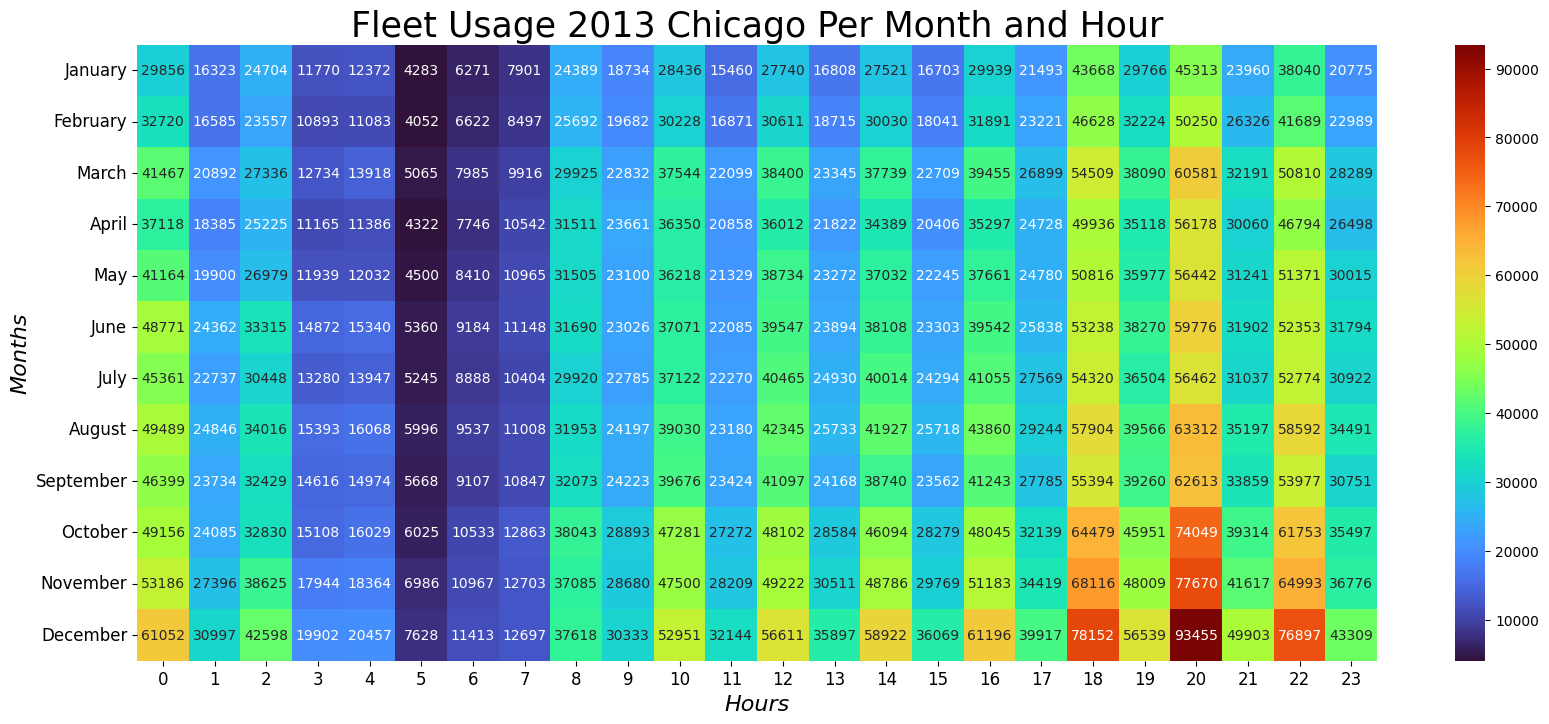

In [61]:
pivot = dfFleet_usage_hourly_over_2013.pivot(index='start_time_month', columns='start_time_hourly', values='Trip_ID')

plt.figure(figsize = (20,8))

hmap= sns.heatmap(pivot, cmap="turbo", annot=True, fmt="d", yticklabels=months)

# styling the output heatmap plot
plt.yticks(rotation=0, fontsize=12)
plt.xticks(rotation=0, fontsize=12)
hmap.set_xlabel('Hours', fontsize=16, style='oblique')
hmap.set_ylabel('Months', fontsize=16, style='oblique')
hmap.axes.set_title("Fleet Usage 2013 Chicago Per Month and Hour", fontsize=25)

plt.show()

In [69]:
def create_df_average_max_temp(time):
    
    # dataframe for monthly average max temparatures
    if time == 'month':
        dfWeather_average_max_temp = dfChicago.groupby(['start_time_month'])['temperature_celsius'].mean().reset_index()
    # dataframe for weekly average max temparatures
    elif time == 'week':
        dfWeather_average_max_temp = dfChicago.groupby(['start_time_week'])['temperature_celsius'].mean().reset_index()
    # dataframe for daily average max temparatures
    elif time == 'date':
        dfWeather_average_max_temp = dfChicago.groupby(['start_time_day'])['temperature_celsius'].mean().reset_index()
    else:
        return "False Statement. Please provide other input."
    
    return dfWeather_average_max_temp['temperature_celsius']

In [70]:


def create_plot_for_visualization(plot_type, df, timeframe, y_value, max_temp, precip_rate, title, y_axis_left, y_axis_right):
    
    fig, ax1 = plt.subplots(figsize=(12,6))
    
    # checking which kind of plot should be shown
    if plot_type == "barplot":
        sns.barplot(data = df, x='start_time_' + timeframe, y = y_value, alpha=0.5, ax=ax1, color='royalblue')
    elif plot_type == "lineplot":
        sns.lineplot(data = df, x='start_time_' + timeframe, y = y_value, sort = False, ax=ax1, color='royalblue')
    else:
        return "False input. Define right plot type."
    
    # check whether visualization of precip rate requested
    if max_temp:
        # lineplot for weather data - average max temp per month
        ax2 = ax1.twinx()
        sns.lineplot(data = create_df_average_max_temp(timeframe), sort = False, ax=ax2, color='darkorange')
        
    # check which style for the labels of the x axis is requested
    if timeframe == 'month':
        # set ticks on x axis to named months
        plt.xticks(range(len(months)), months, fontsize=14, rotation=0)
    elif timeframe == 'date':
        # set ticks on x axis to certain dates
        plt.xticks(range(len(dates)), dates, fontsize=14, rotation=0)
    else:
        plt.xticks(fontsize=14, rotation=0)
    
    # styling of the plot
    # set title & axis labels
    ax1.set_title(title, fontsize=18)
    ax1.set_xlabel(timeframe.capitalize(), fontsize=14, style='oblique')
    ax1.set_ylabel(y_axis_left, color="royalblue", fontsize=14, style='oblique')
    ax2.set_ylabel(y_axis_right,color="darkorange", fontsize=14, style='oblique')

    # set color of y axis 
    ax1.tick_params(axis='y',colors="royalblue", labelsize=14)
    ax2.tick_params(axis='y',colors="darkorange", labelsize=14)
    if precip_rate:
        ax2.spines['right'].set_color("darkorange")
    elif not precip_rate:
        ax2.spines['right'].set_color("darkorange")
        ax2.spines['left'].set_color("royalblue")

    fig = plt.gcf()
    fig.set_size_inches(16, 9)
    plt.show()

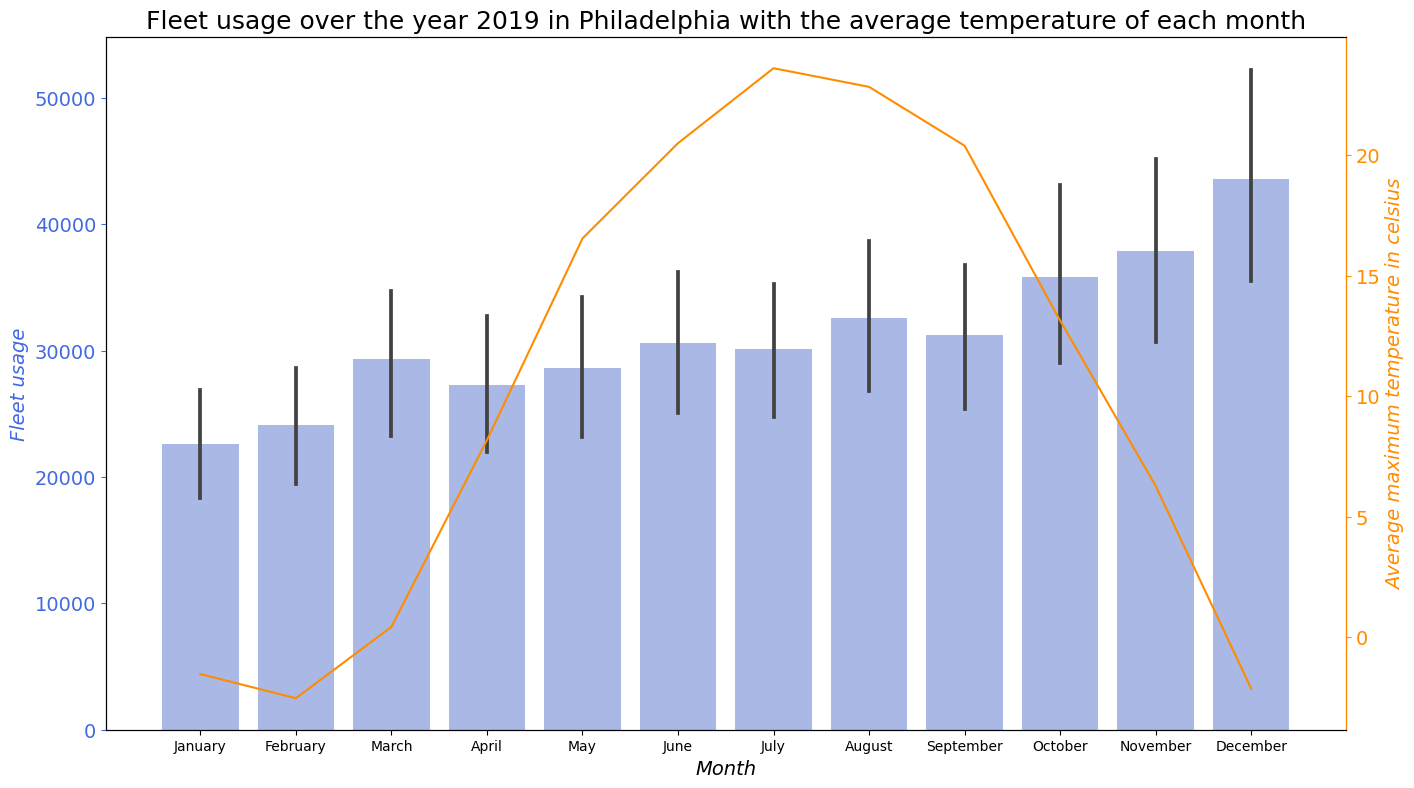

In [73]:
create_plot_for_visualization("barplot", dfChicago_hourly.groupby(['start_time_month', 'start_time_hourly'])['numOfTaxisHourly'].sum().reset_index(), 
                              'month', 'numOfTaxisHourly', True, True, 
                             "Fleet usage over the year 2019 in Philadelphia with the average temperature of each month",
                             "Fleet usage", "Average maximum temperature in celsius")

### Census tract vs. varying hexagon diameter

### Census tract vs. diff temporal bin sizes

## More features